<a href="https://colab.research.google.com/github/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Semana%204/4_1_Distribuciones_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  0 Librerías y funciones

In [55]:
import numpy as np
import pandas as pd

import collections
import itertools 

import matplotlib.pyplot as plt
import seaborn as sns

# 1 Distribución de probabilidad uniforme

## 1.1 Distribución de probabilidad del resultado de lanzar un dado 

In [5]:
W = [1, 2, 3, 4, 5, 6]   #omega
P = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]        

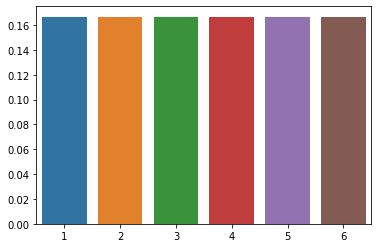

In [56]:
sns.barplot(x = W, y = P)
plt.show()

###1.1.2 Distribución de frecuencias al lanzar un dado (aproximación empírica)

Simularemos que lanzamos un dado al azar *n* número de veces  y graficaremos su distribución

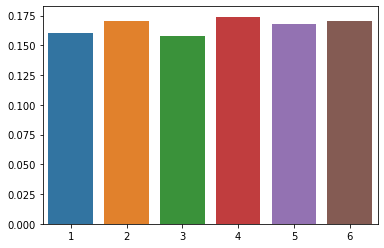

In [64]:
n =10000
dado = [1, 2, 3, 4, 5, 6]

resultado = []

for _ in range (n):
  tiro = np.random.choice(X)

  resultado.append(tiro)

cont = collections.Counter(np.array(resultado))
sum = [k for k in cont.keys()]
frec_rel = [v/n for v in cont.values()]

sns.barplot(x = sum, y=frec_rel)
plt.show()

## 1.2 Ley de probabilidad de obtener cierta combinación al tirar dos dados

In [11]:
dado = [1, 2, 3, 4, 5, 6] 

#obtener las 36 combinaciones
combinaciones = list(itertools.product(dado, repeat=2)) #omega
probabilidades = list(itertools.repeat(1/36,36))

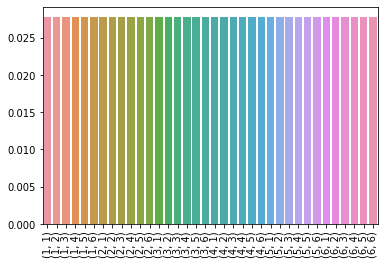

In [13]:
grafica = sns.barplot(x = [str(i) for i in combinaciones], y= probabilidades)
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=90)

plt.show()

# 2 Distribución de probabilidad no uniforme

## 2.1 Distribución de probabilidad de la suma de dos dados

In [18]:
dos_dados = pd.DataFrame(combinaciones)
dos_dados.columns = ['dado1', 'dado2']
dos_dados['suma'] = dos_dados['dado1'] + dos_dados['dado2']

dos_dados

,dado1,dado2,suma
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6
5,1,6,7
6,2,1,3
7,2,2,4
8,2,3,5
9,2,4,6


* ¿con cuántas combinaciones de los dados podemos obtener como resultado de la  suma un 2?
* ¿y un 12?
* ¿y un 7?

In [26]:

dos_dados['suma'].value_counts(sort=False)

2     1
3     2
4     3
5     4
6     5
7     6
8     5
9     4
10    3
11    2
12    1
Name: suma, dtype: int64

In [19]:
Ley_P_suma = pd.DataFrame(dos_dados['suma'].value_counts(sort=False, 
                                                         normalize=True))

Ley_P_suma.reset_index(inplace=True)
Ley_P_suma.columns=['elementos', 'probabilidad']

Ley_P_suma

,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [27]:
Ley_P_suma['probabilidad'].sum()

1.0

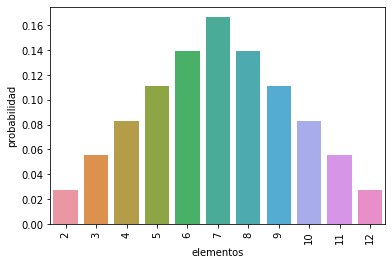

In [21]:
grafica = sns.barplot(x = 'elementos', y= 'probabilidad', data=Ley_P_suma)
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=90)

plt.show()

### 2.1.2 Distribución de frecuencias de la suma obtenida al lanzar dos dados (aproximación empírica)

Simularemos que lanzamos dos dados al azar y sumamos el resultado *n* número de veces y graficaremos su distribución

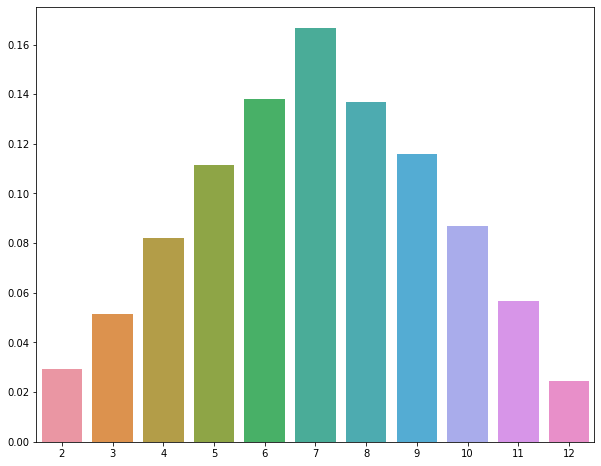

In [70]:
n =10000
X = [1, 2, 3, 4, 5, 6]

dado1 = []  
dado2 = []   
suma = []    #variable aleatoria ¿distribución?

for _ in range (n):
  tiro_d1 = np.random.choice(X)
  tiro_d2 = np.random.choice(X)

  dado1.append(tiro_d1)
  dado2.append(tiro_d2)
  suma.append(tiro_d1 + tiro_d2)

cont = collections.Counter(np.array(suma))
sum = [k for k in cont.keys()]
frec_rel = [v/n for v in cont.values()]

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(ax=ax,  x = sum,   y=frec_rel)
plt.show()

#Ejercicio

1. Variar n en el punto 1.1.2 , al menos usando n = 10, 100, 500, 1000, 10000
2. Compara la distribución de frecuencia obtenida con la distribución de probabilidad del punto 1.1
3. Realiza el mismo experimento de variar n pero ahora en el punto 2.1.2 y comparalo con la distribución de probabilidad del punto 2.1
4. Describe tus observaciones 
